In [1]:
import pandas as pd
from wordcloud import STOPWORDS

In [2]:
#add some unnecessary words to STOPWORDS list
STOPWORDS.add("rt")
STOPWORDS.add("s")
STOPWORDS.add("u")
STOPWORDS.add("amp")
STOPWORDS.add("th")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("m")
STOPWORDS.add("ha")
STOPWORDS.add("wa")
STOPWORDS.add("today")

In [3]:
#read the cleaned data from pickle file
df=pd.read_pickle("corpus.pkl")

In [4]:
#necessary package to split the data into test and train split
from sklearn.model_selection import train_test_split

In [5]:
#spliting the data
train, test = train_test_split(df, test_size=0.3, train_size=0.7, random_state=14)
train.shape, test.shape

((60521, 5), (25938, 5))

In [6]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.lancaster import LancasterStemmer
import nltk

In [7]:
#performing stemming
st = LancasterStemmer()
def token(text):
    txt = nltk.word_tokenize(text.lower())
    return [st.stem(word) for word in txt]

In [8]:
#document term matrix for the tweets
tfv = TfidfVectorizer(tokenizer=token,stop_words=STOPWORDS,
                     analyzer=u'word', min_df=4,norm='l2',use_idf=True)
X_train_tfv = tfv.fit_transform(train['clean_tweet']) # fit_transform learns the vocab and one-hot encodes
X_test_tfv = tfv.transform(test['clean_tweet']) # transform uses the same vocab and one-hot encodes
# print the dimensions of the training set (text messages, terms)
print(X_train_tfv.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'abov', 'aft', 'al', 'ar', 'becaus', 'bef', 'ca', 'doe', 'dur', 'els', 'ev', 'furth', 'hav', 'hent', 'howev', 'let', 'lik', 'mor', 'must', "n't", 'ont', 'oth', 'otherw', 'ourselv', 'ov', 'sam', 'sha', 'shal', 'sint', 'som', 'themselv', 'ther', 'theref', 'thes', 'thi', 'thos', 'und', 'wer', 'wher', 'whil', 'wil', 'wo', 'yo', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(60521, 8830)


In [9]:
X_train_tfv = pd.DataFrame(X_train_tfv.toarray(), columns=tfv.get_feature_names())
X_test_tfv = pd.DataFrame(X_test_tfv.toarray(), columns=tfv.get_feature_names())
Y_train = train['Party_log']
Y_test = test['Party_log']

In [10]:
X_train_tfv

,aaas,aaf,aajc,aan,aap,aapiequalpay,aapiheritagemon,aaron,aarp,aarpadvoc,...,zink,zion,zip,zoe,zon,zte,zuckerb,zuckerberg,zuckerberghear,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#import the necessary packages for building the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### Naive Bayes

In [20]:
#Naive Bayes
nb = MultinomialNB()
# Train the model
nb.fit(X_train_tfv, train['Party_log'])
# Take the model that was trained on the X_train_tfv data and apply it to the X_test_tfv data
y_pred_tfv_nb = nb.predict(X_test_tfv)
y_pred_tfv_nb

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [21]:
accuracy_score(y_pred_tfv_nb, test['Party_log'])

0.7846402960906778

In [23]:
import matplotlib.pyplot as plt
from pandas import Series
import seaborn as sns

Accuracy: 0.785
Precision: 0.799
Recall: 0.744
F1 Score: 0.771


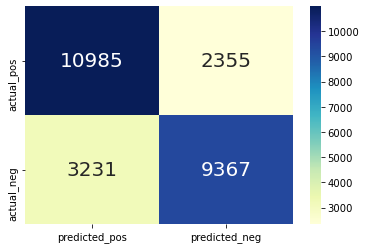

In [24]:
cm = confusion_matrix(test['Party_log'], y_pred_tfv_nb)
sns.heatmap(cm, xticklabels=['predicted_pos', 'predicted_neg'], yticklabels=['actual_pos', 'actual_neg'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### Logistic Regression

In [25]:
#Logistic regression model
lr = LogisticRegression()
# Train the model
lr.fit(X_train_tfv,train['Party_log'])
# Take the model that was trained on the X_train_tfv data and apply it to the X_test_tfv data
y_pred_tfv_lr = lr.predict(X_test_tfv)
y_pred_tfv_lr

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
accuracy_score(y_pred_tfv_lr, test['Party_log'])

0.7814789112499037

Accuracy: 0.781
Precision: 0.781
Recall: 0.764
F1 Score: 0.772


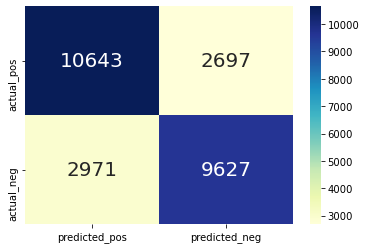

In [28]:
cm = confusion_matrix(test['Party_log'], y_pred_tfv_lr)
sns.heatmap(cm, xticklabels=['predicted_pos', 'predicted_neg'], yticklabels=['actual_pos', 'actual_neg'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### RandomForest

In [29]:
#Random Forest Classification
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train_tfv,train['Party_log'])
y_pred_tfv_rfc=rfc.predict(X_test_tfv)

Accuracy: 0.747
Precision: 0.761
Recall: 0.699
F1 Score: 0.729


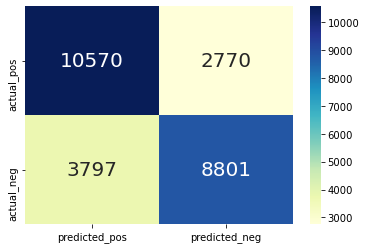

In [30]:
cm = confusion_matrix(test['Party_log'], y_pred_tfv_rfc)
sns.heatmap(cm, xticklabels=['predicted_pos', 'predicted_neg'], yticklabels=['actual_pos', 'actual_neg'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### AdaBoost

In [31]:
#AdaBoost Classification
ac = AdaBoostClassifier(n_estimators = 100)
ac.fit(X_train_tfv, train['Party_log'])
y_pred_tfv_ada = ac.predict(X_test_tfv)
accuracy_score(y_pred_tfv_ada, test['Party_log'])

0.636941938468656

Accuracy: 0.637
Precision: 0.588
Recall: 0.845
F1 Score: 0.693


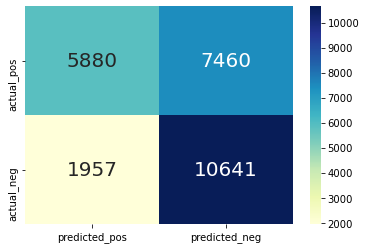

In [32]:
cm = confusion_matrix(test['Party_log'], y_pred_tfv_ada)
sns.heatmap(cm, xticklabels=['predicted_pos', 'predicted_neg'], yticklabels=['actual_pos', 'actual_neg'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### DecisionTrees


In [12]:
#Decision Tree Classification
dtc = DecisionTreeClassifier(random_state = 42, criterion='entropy', max_depth=30)
dtc.fit(X_train_tfv, train['Party_log'])
y_pred__tfv_dtc = dtc.predict(X_test_tfv)

Accuracy: 0.592
Precision: 0.844
Recall: 0.196
F1 Score: 0.318


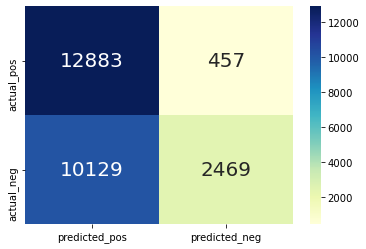

In [15]:
cm = confusion_matrix(test['Party_log'], y_pred__tfv_dtc)
sns.heatmap(cm, xticklabels=['predicted_pos', 'predicted_neg'], yticklabels=['actual_pos', 'actual_neg'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

### Comparing the accuracy for individual labels

In [14]:
import scipy 
import scipy.sparse as sp
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [34]:
print(classification_report(y_pred_tfv_nb,test['Party_log']))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80     14216
           1       0.74      0.80      0.77     11722

    accuracy                           0.78     25938
   macro avg       0.78      0.79      0.78     25938
weighted avg       0.79      0.78      0.79     25938



In [35]:
print(classification_report(y_pred_tfv_rfc,test['Party_log']))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     14367
           1       0.70      0.76      0.73     11571

    accuracy                           0.75     25938
   macro avg       0.75      0.75      0.75     25938
weighted avg       0.75      0.75      0.75     25938



In [36]:
print(classification_report(y_pred_tfv_lr,test['Party_log']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     13614
           1       0.76      0.78      0.77     12324

    accuracy                           0.78     25938
   macro avg       0.78      0.78      0.78     25938
weighted avg       0.78      0.78      0.78     25938



In [37]:
print(classification_report(y_pred_tfv_ada,test['Party_log']))

              precision    recall  f1-score   support

           0       0.44      0.75      0.56      7837
           1       0.84      0.59      0.69     18101

    accuracy                           0.64     25938
   macro avg       0.64      0.67      0.62     25938
weighted avg       0.72      0.64      0.65     25938



In [16]:
print(classification_report(y_pred__tfv_dtc,test['Party_log']))

              precision    recall  f1-score   support

           0       0.97      0.56      0.71     23012
           1       0.20      0.84      0.32      2926

    accuracy                           0.59     25938
   macro avg       0.58      0.70      0.51     25938
weighted avg       0.88      0.59      0.66     25938

